1. How grade and conditions along with other factors impact on house price in kane county?
2.In which way dependent variable make group in respect of house sales in kane county?
3.how explanatory variables create clustering?



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # for predictive model 1 - continuous dependent varible 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [3]:
import pandas as pd
data_kn = pd.read_csv("F:\Python Project\housesalesprediction\kc_house_data.csv",header=0)
data_kn

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0


# Model for linear Regression

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
results = smf.ols('price ~ sqft_living + sqft_lot + floors + condition + grade + sqft_above + sqft_basement ', data_kn).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4421.
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        19:35:53   Log-Likelihood:            -2.9896e+05
No. Observations:               21613   AIC:                         5.979e+05
Df Residuals:                   21606   BIC:                         5.980e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.702e+05   1.74e+04    -50.047      0.000   -9.04e+05   -8.36e+05
sqft_living     126.2612      1.958     64.478      0.000     122.423     130.099
sqft_lot         -0.2035      0.041     -4.911      0.000      -0.285      -0.122
floors        -1.046e+04   3930.212     -2.661      0.008   -1.82e+04   -2753.384
condition       5.56e+04   2693.145     20.644      0.000    5.03e+04    6.09e+04
grade          1.156e+05   2352.932     49.137      0.000    1.11e+05     1.2e+05
sqft_above       36.6691      2.414     15.189      0.000      31.937      41.401
sqft_basement    89.5921      2.841     31.531      0.000      84.023      95.161
==============================================================================
Omnibus:                    17267.938   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1116979.844
Skew:                           3.366   Prob(JB):                         0.00
Kurtosis:                      37.569   Cond. No.                     9.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.86e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Classification 

In [5]:
#Creating new categorical variable 'h_status'
data_kn.loc[data_kn['price']<450000, 'h_status']=0 # cheaper house price
data_kn.loc[(data_kn['price']>=450000), 'h_status']=1  # expensive house price
#data_file.to_csv('F:\Week 15\\data_file.csv')
#data1=pd.read_csv('F:\Week 15\\data_file.csv', header=0)

In [6]:
data_kn

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,h_status
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,0.0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1.0
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,0.0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1.0
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,0.0
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,0.0
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,0.0
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,0.0


In [7]:
from sklearn import linear_model
import statsmodels.api as sm #for predictive model 2 - categorical dependent varible 

# setting the predictive model 
y = (data_kn['h_status'])
X = (data_kn[['floors','grade','bathrooms' ]])
X = sm.add_constant(X, prepend=True)
X

,const,floors,grade,bathrooms
0,1.0,1.0,7,1.00
1,1.0,2.0,7,2.25
2,1.0,1.0,6,1.00
3,1.0,1.0,7,3.00
4,1.0,1.0,8,2.00
...,...,...,...,...
21608,1.0,3.0,8,2.50
21609,1.0,2.0,8,2.50
21610,1.0,2.0,7,0.75
21611,1.0,2.0,8,2.50


In [8]:
logit_model = sm.Logit(y,X) #creating a model and passing the data
logit_fit = logit_model.fit() #fitting the model
logit_fit.summary() #displaying the result

Optimization terminated successfully.
         Current function value: 0.522165
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               h_status   No. Observations:                21613
Model:                          Logit   Df Residuals:                    21609
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 May 2020   Pseudo R-squ.:                  0.2466
Time:                        19:35:58   Log-Likelihood:                -11286.
converged:                       True   LL-Null:                       -14980.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2419      0.166    -61.706      0.000     -10.567      -9.917
floors        -0.3063      0.034     -8.881      0.000      -0.374      -0.239
grade          1.3128      0.025     51.560      0.000       1.263       1.363
bathrooms      0.3749      0.030     12.405      0.000       0.316       0.434
==============================================================================
"""

In [9]:
logit_fit.predict([[1, 1, 3, 1000]])  #predict method of fitted model logit_fit

array([1.])

In [10]:
data_hs = data_kn[['price', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade']]
data_hs.head()

,price,bathrooms,sqft_living,floors,condition,grade
0,221900.0,1.00,1180,1.0,3,7
1,538000.0,2.25,2570,2.0,3,7
2,180000.0,1.00,770,1.0,3,6
3,604000.0,3.00,1960,1.0,5,7
4,510000.0,2.00,1680,1.0,3,8


In [29]:
#Decision Tree for classification
from sklearn import tree #should be in Preamble

#convert the dataframe in to array
y =  np.array(data_hs['price'])
X = np.array(data_hs[['floors', 'grade','bathrooms']])

#calling the model and giving a name clf_model so as to use it again; 
#random state set the seed so that output is reproducible
clf_model = tree.DecisionTreeClassifier(random_state=0)
clf_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

# Clustering

In [12]:
#create a dataframe that has variables that will be used for clustering 
cluster_data = data_hs[['bathrooms', 'sqft_living', 'floors', 'grade']] 
cluster_data.head()

,bathrooms,sqft_living,floors,grade
0,1.00,1180,1.0,7
1,2.25,2570,2.0,7
2,1.00,770,1.0,6
3,3.00,1960,1.0,7
4,2.00,1680,1.0,8


In [13]:
from sklearn import cluster #import the module cluster that has clustering class KMeans
kmeans_model = cluster.KMeans(n_clusters=3, random_state=42) 
kmeans_model.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

# Cluster Labels
Fitted Clustering model is not used to predict any dependent variable, but it is used to generate groups. Python stores them as cluster lables starting from 0. For example, K=5 generate labels as 0,1,2,3,4 and K=3 generate labels as 0,1,2.

In [14]:
#generate labels by using the method labels_ This generates a numpy array 
label_array = kmeans_model.labels_
print(label_array)
#just to avoid any issues later in processing use the astype() method of array to convert the data type to integer
#store them as labels
label_integer = label_array.astype(int) 
print(label_integer)
# converting the labels in to a dataframe and naming the column as Cluster 
cluster_labels = pd.DataFrame(label_integer, columns = ['Clusters'])
cluster_labels

[1 0 1 ... 1 1 1]
[1 0 1 ... 1 1 1]


,Clusters
0,1
1,0
2,1
3,0
4,1
...,...
21608,1
21609,0
21610,1
21611,1


# Displaying the Clustering Results in a 3D plot

In [15]:
scatter_data = cluster_data.join(cluster_labels) 
scatter_data.head()

,bathrooms,sqft_living,floors,grade,Clusters
0,1.00,1180,1.0,7,1
1,2.25,2570,2.0,7,0
2,1.00,770,1.0,6,1
3,3.00,1960,1.0,7,0
4,2.00,1680,1.0,8,1


In [16]:
scatter_data['Clusters'].unique() #will tell how many clusters are there

array([1, 0, 2])

In [17]:
scatter_data['Clusters'].value_counts() #will tell how many clusters are there 

1    10918
0     8374
2     2321
Name: Clusters, dtype: int64

# 3D plots with multiple groups

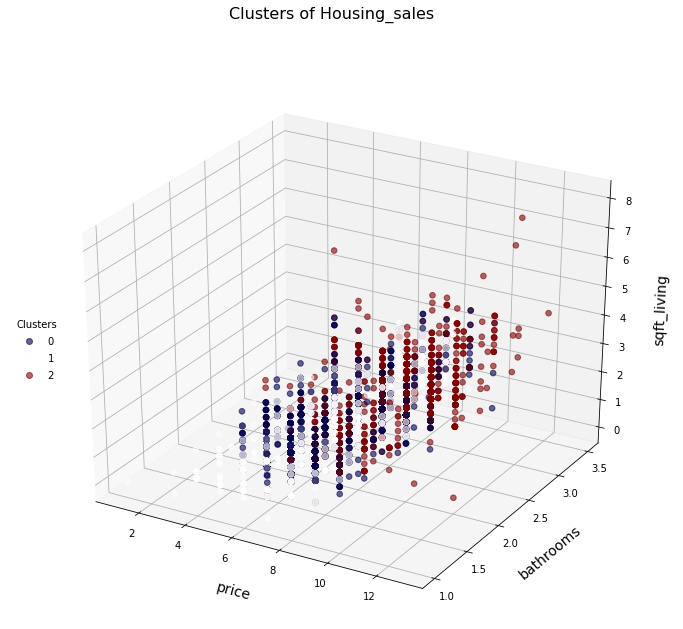

In [18]:
from mpl_toolkits.mplot3d import Axes3D
plt.close('all') #sanity statement for closing all existing plots 
fig, ax3 = plt.subplots(figsize=(12, 10), subplot_kw = {'projection': '3d'})

# giving title to the figure using the method suptitle for Figure object fig
fig.suptitle("Clusters of Housing_sales", fontsize=16) 

#extracting the columns and converting into arrays for no hassles in processing later
x = np.array(scatter_data.loc[:, 'grade'])
y = np.array(scatter_data.loc[:, 'floors'])
z = np.array(scatter_data.loc[:, 'bathrooms'])
cluster_color_code = np.array(scatter_data.loc[:, "Clusters"])
scatter_plot = ax3.scatter(x, y, z, c=cluster_color_code, cmap='seismic', s=10**1.5, alpha =0.6)
ax3.legend(*scatter_plot.legend_elements(), loc="center left",
              title="Clusters", frameon=False)

# Managing the aesthetics
ax3.set_xlabel(data_hs.columns[0], fontsize=14)
ax3.set_ylabel(data_hs.columns[1], fontsize=14)
ax3.set_zlabel(data_hs.columns[2], fontsize=14)
ax3.xaxis.labelpad = 15
ax3.yaxis.labelpad = 15
ax3.zaxis.labelpad = 15

plt.show()

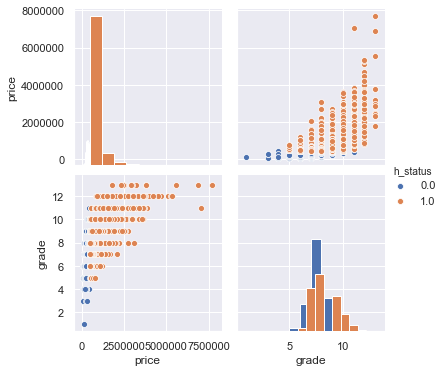

In [19]:
#MATPLOTLIB GRAPH
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns #import seaborn as sns
sns.set() #resets the asethical features to default
sns.pairplot(data = data_kn[['price', 'grade','h_status']], hue = 'h_status', diag_kind = "hist" );

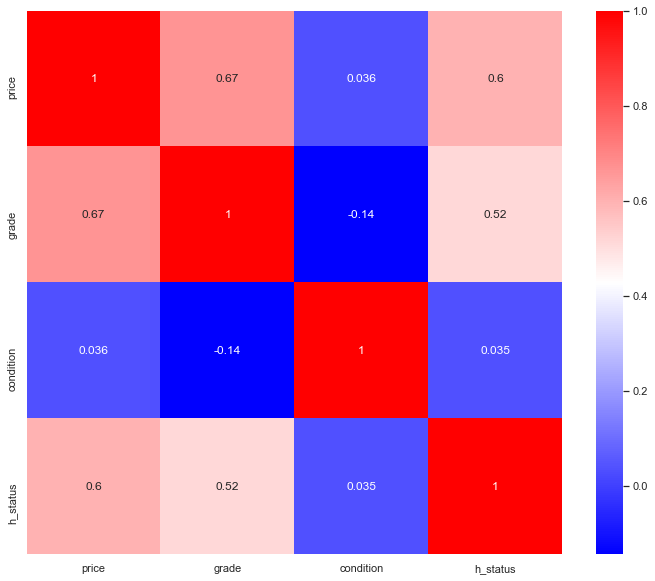

In [20]:
#HEAT MAP
data_heat=data_kn[['price','grade','condition','h_status']]
# Let's first visualize correlation using a visual Heat map
corr = data_heat.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='bwr')#plt.cm.Reds)

# Feautures Engineering
Carry out at least two methods of feature engineering such as standardizing, dimensionality reduction or creating new features.

price
bathrooms
sqft_living
floors
condition
grade


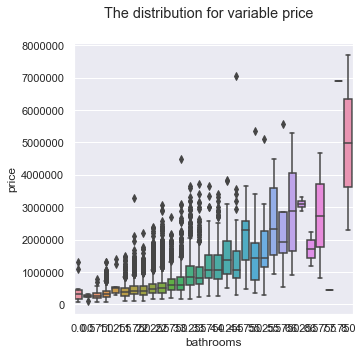

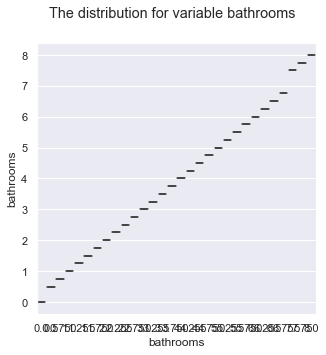

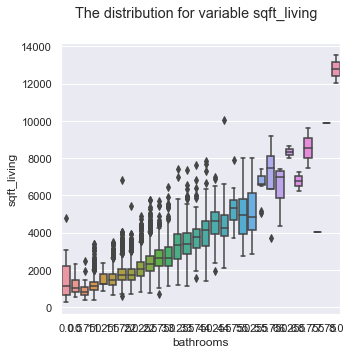

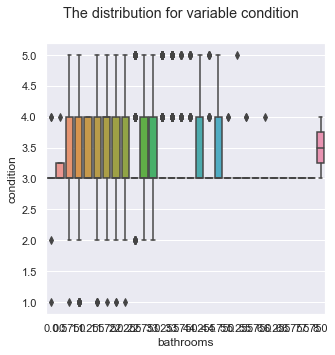

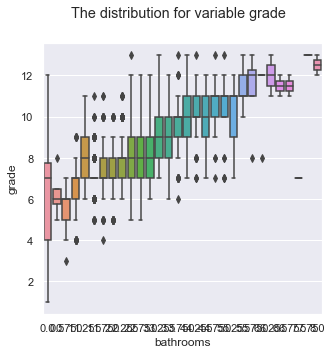

In [21]:
#Box plots
for col in data_hs.columns:
    print(col)
    if col != 'floors':
        fig, ax = plt.subplots(figsize = (5,5))
        sns.boxplot(x="bathrooms", y=col, data=data_hs);     
        fig.suptitle("The distribution for variable " + col)
        fig.savefig("Distribution_"+col+".png")

In [22]:
#%%  Standardization and Dropping Outliers
from scipy.stats import zscore

variable = 'h_status'
data_kn[variable +'_zscore'] = zscore(data_kn[variable])
data_kn = data_kn[(data_kn[variable+'_zscore'] >= -3) & 
                      (data_kn[variable+'_zscore'] <= 3)]

data_kn.reset_index(drop=True, inplace=True)

In [23]:
#%% . Removing features that are correlated

features = data_kn.drop(labels=['condition',variable+'_zscore'] , axis=1)


In [24]:
#Creates a feature in correlation table
upper_triangle = np.triu(np.ones(corr.shape)).astype(np.bool) # the upper triangle
corr_upper_triangle = corr.where(upper_triangle) #nan for lower triangle
stacked_corr = corr_upper_triangle.stack().reset_index()
stacked_corr.columns = ['Feature1', 'Feature2', 'Correlation']

In [25]:
# Drop the diagonal elements and correlation higher than a threshold
temp = stacked_corr['Feature1'] != stacked_corr['Feature2']
stacked_corr = stacked_corr[temp]

drop_features = stacked_corr[np.abs(stacked_corr['Correlation']) > 0.7] #drop rows
temp_drop = drop_features['Feature1'].unique()

keep_features = features.columns[~features.columns.isin(temp_drop)] #keep rows
features_aftr_corr = features[keep_features]

In [26]:
#%% Removing features that does not meet the Variance threshold
    
from sklearn import feature_selection

# use the module feature_selection and class VarianceThreshold 
# create an object of this class 
obj_var = feature_selection.VarianceThreshold(threshold=0.010)
after_aftr_variance = obj_var.fit_transform(features_aftr_corr)

In [27]:
# add the column names as fit_transforms drop those
retained_columns_indices = obj_var.get_support(indices=True)
retained_columns_names = features_aftr_corr.columns[retained_columns_indices]

# #saving the features/variables
features_aftr_variance = features_aftr_corr[retained_columns_names]
